In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/My Drive/Datasets/'

In [4]:
import pandas as pd
# Replace 'your_dataset.csv' with the actual name of your dataset
dataset_filename = 'KDDTrain+.txt'
data_train = pd.read_csv(dataset_path + dataset_filename)

In [5]:
dataset_filename = 'KDDTest+.txt'
data_test = pd.read_csv(dataset_path + dataset_filename)

In [6]:
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome","level"]

In [7]:
# Assign name for columns
data_train.columns = columns
data_test.columns = columns

In [8]:
# Check data
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [9]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [10]:
print(data_train.shape)
print(data_test.shape)

(125972, 43)
(22543, 43)


In [11]:
unique_values = data_train['outcome'].unique()
print(unique_values)

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

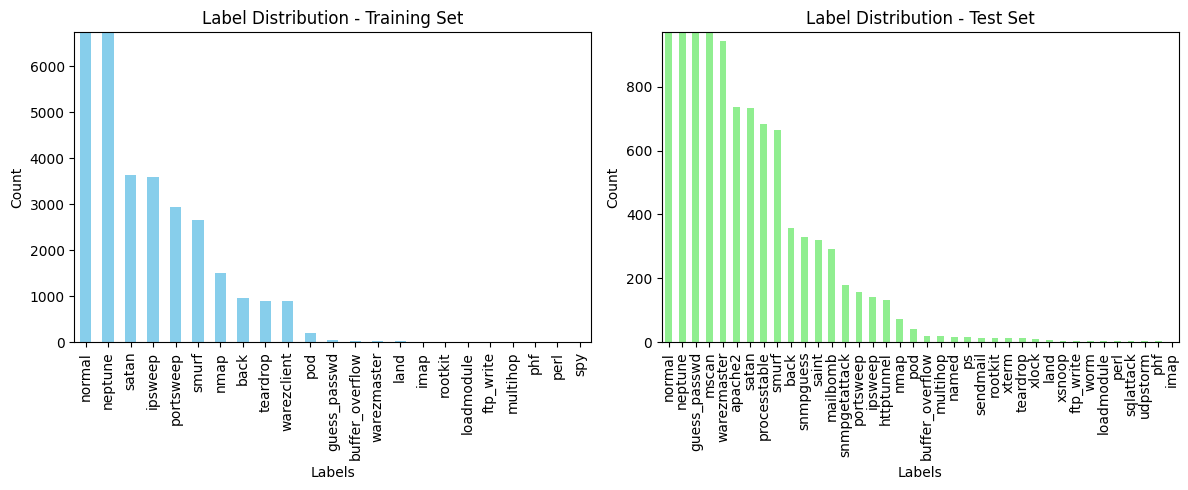

In [14]:
import matplotlib.pyplot as plt

# Assuming dataset_train and dataset_test are your training and test datasets
# Replace 'label' with the actual column name in your datasets
label_column = 'outcome'

# Plotting label distribution for the training set
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data_train[label_column].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution - Training Set')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.ylim(0, max(data_train[label_column].value_counts()) // 10)  # Adjust the ylim as needed

# Plotting label distribution for the test set
plt.subplot(1, 2, 2)
data_test[label_column].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Label Distribution - Test Set')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.ylim(0, max(data_test[label_column].value_counts()) // 10)  # Adjust the ylim as needed

plt.tight_layout()
plt.show()


In [15]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in data_train.columns:
    if data_train[col_name].dtypes == 'object' :
        unique_cat = len(data_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'outcome' has 23 categories


In [16]:
# Test set
print('Test set:')
for col_name in data_test.columns:
    if data_test[col_name].dtypes == 'object' :
        unique_cat = len(data_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'outcome' has 38 categories


In [17]:
#Handling NaN values
data_train = data_train.fillna(data_train.mean())
data_test = data_test.fillna(data_test.mean())

In [18]:
unique_values = data_train['outcome'].unique()
print(unique_values)
def change_label(data_train):
  data_train.outcome.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  data_train.outcome.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  data_train.outcome.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  data_train.outcome.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(data_train)
unique_values = data_train['outcome'].unique()
print(unique_values)

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
['normal' 'Dos' 'R2L' 'Probe' 'U2R']


In [19]:
#Handling Outliers
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,21


In [20]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20


In [21]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']

def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    # dataframe = pd.get_dummies(dataframe, columns = ['Protocol_type', 'service', 'flag','outcome'])

    return dataframe
print(data_train.shape)

(125972, 43)


In [22]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20


In [34]:
scaled_train = preprocess(data_train)
scaled_test=preprocess(data_test)
# scaled_train['outcome']=data_train['outcome']

# Create a sample DataFrame with a categorical column
# data = {'Category': ['normal' 'Dos' 'R2L' 'Probe' 'U2R']}
# df = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
scaled_train['outcome'] = label_encoder.fit_transform(data_train['outcome'])
scaled_train['service'] = label_encoder.fit_transform(data_train['service'])
scaled_train['protocol_type'] = label_encoder.fit_transform(data_train['protocol_type'])
scaled_train['flag'] = label_encoder.fit_transform(data_train['flag'])

scaled_test['outcome'] = label_encoder.fit_transform(data_test['outcome'])
scaled_test['service'] = label_encoder.fit_transform(data_test['service'])
scaled_test['protocol_type'] = label_encoder.fit_transform(data_test['protocol_type'])
scaled_test['flag'] = label_encoder.fit_transform(data_test['flag'])
# scaled_train.head(20)
# print(data_train.head())
print(scaled_train.head())
# scaled_train.shape

   protocol_type  service  flag  land  logged_in  is_host_login  \
0              2       44     9     0          0              0   
1              1       49     5     0          0              0   
2              1       24     9     0          1              0   
3              1       24     9     0          1              0   
4              1       49     1     0          0              0   

   is_guest_login  outcome  level  duration  src_bytes  dst_bytes  \
0               0        4     15       0.0   0.369565   0.000000   
1               0        0     19       0.0  -0.159420   0.000000   
2               0        4     21       0.0   0.681159  15.800388   
3               0        4     21       0.0   0.561594   0.813953   
4               0        0     21       0.0  -0.159420   0.000000   

   wrong_fragment  urgent  hot  num_failed_logins  num_compromised  \
0             0.0     0.0  0.0                0.0              0.0   
1             0.0     0.0  0.0            

In [35]:
selected_columns = ['protocol_type','service','flag','src_bytes','wrong_fragment', 'urgent','hot','num_failed_logins','logged_in','num_compromised','num_root','num_file_creations','is_host_login','is_guest_login','count','srv_count','srv_serror_rate','rerror_rate','srv_diff_host_rate','dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate']
dos_data = scaled_train[selected_columns].copy()
dos_data_test = scaled_train[selected_columns].copy()
dos_data.head()
dos_data.shape

(125972, 22)

In [36]:
selected_columns = ['protocol_type','service','flag','dst_bytes','src_bytes','land','hot','num_failed_logins','root_shell','su_attempted','num_file_creations','num_access_files','is_guest_login','count','serror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate', 'dst_host_rerror_rate','dst_host_srv_serror_rate']
probe_data = scaled_train[selected_columns].copy()
probe_data_test = scaled_train[selected_columns].copy()
probe_data.head()
probe_data.shape

(125972, 23)

In [37]:
selected_columns = ['duration','service','src_bytes','hot','num_failed_logins','root_shell','dst_host_srv_diff_host_rate','num_shells','is_guest_login','rerror_rate','srv_rerror_rate','same_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','num_compromised','dst_host_srv_serror_rate']
r2l_u2r_data = scaled_train[selected_columns].copy()
r2l_u2r_data_test = scaled_train[selected_columns].copy()
r2l_u2r_data.head()
r2l_u2r_data.shape

(125972, 20)

In [ ]:
# # take label column
# labeldf=scaled_train['outcome']
# labeldf_test=scaled_test['outcome']
# # change the label column
# newlabeldf=labeldf.replace({ 'normal' : 0, 'Dos' : 1 ,'Probe' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
#                            ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
#                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
#                            'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
#                            ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
#                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# # put the new label column back
# newdf['outcome'] = newlabeldf
# newdf_test['outcome'] = newlabeldf_test
# print(newdf['outcome'].head())

In [46]:
DoS_df=scaled_train[~scaled_train['outcome'].isin(dos_data)];
Probe_df=scaled_train[~scaled_train['outcome'].isin(probe_data)];
R2L_U2R_df=scaled_train[~scaled_train['outcome'].isin(r2l_u2r_data)];

#test
DoS_df_test=scaled_test[~scaled_test['outcome'].isin(dos_data)];
Probe_df_test=scaled_test[~scaled_test['outcome'].isin(probe_data)];
R2L_U2R_df_test=scaled_test[~scaled_test['outcome'].isin(r2l_u2r_data)];

print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_U2R_df_test.shape)
DoS_df

Train:
Dimensions of DoS: (125972, 43)
Dimensions of Probe: (125972, 43)
Dimensions of R2L: (125972, 43)
Test:
Dimensions of DoS: (22543, 43)
Dimensions of Probe: (22543, 43)
Dimensions of R2L: (22543, 43)


,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,2,44,9,0,0,0,0,4,15,0.0,0.369565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007092,-0.4375,0.0,0.0,0.0,0.0,-1.010989,2.500000,0.00,0.000000,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00
1,1,49,5,0,0,0,0,0,19,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773050,-0.1250,1.0,1.0,0.0,0.0,-1.043956,1.166667,0.00,0.000000,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00
2,1,24,9,0,1,0,0,4,21,0.0,0.681159,15.800388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063830,-0.1875,0.2,0.2,0.0,0.0,0.000000,0.000000,0.00,-1.300578,0.783673,0.515789,-0.285714,0.500000,2.0,0.03,0.01,0.00,0.01
3,1,24,9,0,1,0,0,4,21,0.0,0.561594,0.813953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113475,1.5000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.09,0.000000,0.783673,0.515789,-0.285714,0.000000,0.0,0.00,0.00,0.00,0.00
4,1,49,1,0,0,0,0,0,21,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.758865,0.6875,0.0,0.0,1.0,1.0,-0.923077,1.000000,0.00,0.000000,-0.179592,-0.463158,0.714286,0.000000,0.0,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,49,5,0,0,0,0,0,20,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.205674,1.0625,1.0,1.0,0.0,0.0,-0.945055,1.000000,0.00,0.000000,-0.155102,-0.431579,0.571429,0.000000,0.0,1.00,1.00,0.00,0.00
125968,2,49,9,0,0,0,0,4,21,8.0,0.221014,0.281008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.085106,-0.3750,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.738776,0.473684,-0.142857,0.166667,0.0,0.00,0.00,0.00,0.00
125969,1,54,9,0,1,0,0,4,18,0.0,7.923913,0.744186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.092199,-0.4375,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,-0.134694,-0.410526,0.571429,0.000000,0.0,0.72,0.00,0.01,0.00
125970,1,30,5,0,0,0,0,0,20,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.921986,0.0000,1.0,1.0,0.0,0.0,-1.032967,0.833333,0.00,0.000000,-0.224490,-0.505263,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00


In [58]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables

DoS_df = DoS_df[DoS_df['outcome'].isin([0, 4])]
Probe_df = Probe_df[Probe_df['outcome'] .isin([1, 4])]
X_R2L_U2R = R2L_U2R_df[R2L_U2R_df['outcome'].isin([2, 3, 4])]


DoS_df_test = DoS_df_test[DoS_df_test['outcome'] .isin([0, 4])]
Probe_df_test = Probe_df_test[Probe_df_test['outcome'] .isin([1, 4])]
X_R2L_U2R_test = R2L_U2R_df_test[R2L_U2R_df_test['outcome'].isin([2, 3, 4])]

X_DoS = DoS_df.drop('outcome',1)
Y_DoS = DoS_df.outcome
X_Probe = Probe_df.drop('outcome',1)
Y_Probe = Probe_df.outcome
X_R2L_U2R = R2L_U2R_df.drop('outcome',1)
Y_R2L_U2R = R2L_U2R_df.outcome
# test set
X_DoS_test = DoS_df_test.drop('outcome',1)
Y_DoS_test = DoS_df_test.outcome
X_Probe_test = Probe_df_test.drop('outcome',1)
Y_Probe_test = Probe_df_test.outcome
X_R2L_U2R_test = R2L_U2R_df_test.drop('outcome',1)
Y_R2L_U2R_test = R2L_U2R_df_test.outcome


In [59]:
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 43)
Dimensions of Probe: (78998, 43)
Dimensions of R2L: (125972, 43)
Test:
Dimensions of DoS: (1968, 43)
Dimensions of Probe: (1590, 43)
Dimensions of R2L: (22543, 43)


In [60]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L_U2R)
X_R2L_U2R=scaler3.transform(X_R2L_U2R)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_U2R_test)
X_R2L_U2R_test=scaler7.transform(X_R2L_U2R_test)


In [66]:
from sklearn.svm import SVC

# For DoS with selected features
clf_kbestDoS = SVC(random_state=0)
clf_kbestDoS.fit(X_DoS, Y_DoS.astype(int))

# For Probe with selected features
clf_kbestProbe = SVC(random_state=0)
clf_kbestProbe.fit(X_Probe, Y_Probe.astype(int))

# For R2L with selected features
clf_kbestR2L_U2R = SVC(random_state=0)
clf_kbestR2L_U2R.fit(X_R2L_U2R, Y_R2L_U2R.astype(int))



SVC(random_state=0)

In [67]:
# clf_rfeDoS.predict_proba(X_rfeDoS)[0:10]
Y_DoS_pred=clf_kbestDoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,173,564
4,0,1231


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestDoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99898 (+/- 0.00407)


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestProbe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99937 (+/- 0.00377)


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestR2L_U2R, X_R2L_U2R_test, Y_R2L_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.97405 (+/- 0.00587)


In [ ]:
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
dataset_train_categorical_values = data_train[categorical_columns]
dataset_test_categorical_values = data_test[categorical_columns]

In [ ]:
# protocol type
unique_protocol=sorted(data_train.protocol_type.unique())
string1 = 'protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(data_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(data_train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + str(x) for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(data_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [ ]:
#Transform categorical features into numbers using LabelEncoder()
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())
# test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [ ]:
data_train.shape

(125972, 43)

In [ ]:
data_test.shape

(22543, 43)

In [ ]:
#One-Hot-Encoding¶
enc = OneHotEncoder()
dataset_train_categorical_values_encenc = enc.fit_transform(dataset_train_categorical_values_enc)
dataset_train_cat_data = pd.DataFrame(dataset_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
dataset_test_categorical_values_encenc = enc.fit_transform(dataset_test_categorical_values_enc)
dataset_test_cat_data = pd.DataFrame(dataset_test_categorical_values_encenc.toarray(),columns=testdumcols)

In [ ]:
dataset_train_cat_data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trainservice=data_train['service'].tolist()
testservice= data_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_urh_i',
 'service_http_8001',
 'service_harvest',
 'service_aol',
 'service_red_i',
 'service_http_2784']

In [ ]:
for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape

(22543, 84)

In [ ]:
#Join encoded categorical dataframe with the non-categorical dataframe
newdf=data_train.join(dataset_train_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=data_test.join(dataset_test_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125972, 124)
(22543, 124)


In [ ]:
# take label column
labeldf=newdf['outcome']
labeldf_test=newdf_test['outcome']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['outcome'] = newlabeldf
newdf_test['outcome'] = newlabeldf_test
print(newdf['outcome'].head())

0    0
1    1
2    0
3    0
4    1
Name: outcome, dtype: int64


In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['outcome'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['outcome'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['outcome'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['outcome'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['outcome'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['outcome'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['outcome'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['outcome'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 124)
Dimensions of Probe: (78998, 124)
Dimensions of R2L: (68337, 124)
Dimensions of U2R: (67394, 124)
Test:
Dimensions of DoS: (17170, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


In [ ]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('outcome',1)
Y_DoS = DoS_df.outcome
X_Probe = Probe_df.drop('outcome',1)
Y_Probe = Probe_df.outcome
X_R2L = R2L_df.drop('outcome',1)
Y_R2L = R2L_df.outcome
X_U2R = U2R_df.drop('outcome',1)
Y_U2R = U2R_df.outcome
# test set
X_DoS_test = DoS_df_test.drop('outcome',1)
Y_DoS_test = DoS_df_test.outcome
X_Probe_test = Probe_df_test.drop('outcome',1)
Y_Probe_test = Probe_df_test.outcome
X_R2L_test = R2L_df_test.drop('outcome',1)
Y_R2L_test = R2L_df_test.outcome
X_U2R_test = U2R_df_test.drop('outcome',1)
Y_U2R_test = U2R_df_test.outcome

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [ ]:
# #Handling missing vales
# from sklearn.impute import SimpleImputer
# # Assuming X is your dataset with missing values
# imputer = SimpleImputer(strategy='mean')
# X_DoS = imputer.fit_transform(X_DoS)
# # data_test = imputer.fit_transform(data_test)
# print(X_DoS.std(axis=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


In [ ]:
print(X_DoS.std(axis=0))
print(X_Probe.std(axis=0));
print(X_R2L.std(axis=0));
print(X_U2R.std(axis=0));

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

In [ ]:
#USING a univariate feature selection SelectKBest
# from sklearn.feature_selection import SelectKBest, fisher_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Specify the number of features you want to select
num_features_to_select = 14
# Use mutual information for feature selection
selector = SelectKBest(mutual_info_classif, k=num_features_to_select)
# selector = SelectKBest(fisher_score, k=num_features_to_select)
X_kbestDoS = selector.fit_transform(X_DoS, Y_DoS.astype(int))
# Get the indices of the selected features
kbestcolindex_DoS = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_DoS = list(colNames[i] for i in kbestcolindex_DoS)
# print("Selected Features:", kbestcolname_DoS)

In [ ]:
X_kbestDoS_test = selector.fit_transform(X_DoS_test, Y_DoS_test.astype(int))
# Get the indices of the selected features
kbestcolindex_DoS = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_DoS = list(colNames[i] for i in kbestcolindex_DoS)
# print("Selected Features:", kbestcolname_DoS)

In [ ]:
X_kbestProbe = selector.fit_transform(X_Probe, Y_Probe.astype(int))
# Get the indices of the selected features
kbestcolindex_Probe = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_Probe = list(colNames[i] for i in kbestcolindex_Probe)
# print("Selected Features:", kbestcolname_Probe)

In [ ]:
X_kbestProbe_test = selector.fit_transform(X_Probe_test, Y_Probe_test.astype(int))
# Get the indices of the selected features
kbestcolindex_Probe = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_Probe = list(colNames[i] for i in kbestcolindex_Probe)
# print("Selected Features:", kbestcolname_Probe)

In [ ]:
X_kbestR2L = selector.fit_transform(X_R2L, Y_R2L.astype(int))
# Get the indices of the selected features
kbestcolindex_R2L = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_R2L = list(colNames[i] for i in kbestcolindex_R2L)
# print("Selected Features:", kbestcolname_R2L)

In [ ]:
X_kbestR2L_test = selector.fit_transform(X_R2L_test, Y_R2L_test.astype(int))
# Get the indices of the selected features
kbestcolindex_R2L = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_R2L = list(colNames[i] for i in kbestcolindex_R2L)
# print("Selected Features:", kbestcolname_R2L)

In [ ]:
X_kbestU2R = selector.fit_transform(X_U2R, Y_U2R.astype(int))
# Get the indices of the selected features
kbestcolindex_U2R = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_U2R = list(colNames[i] for i in kbestcolindex_U2R)
# print("Selected Features:", kbestcolname_U2R)

In [ ]:
X_kbestU2R_test = selector.fit_transform(X_U2R_test, Y_U2R_test.astype(int))
# Get the indices of the selected features
kbestcolindex_U2R = selector.get_support(indices=True)
# Get the selected feature names
kbestcolname_U2R = list(colNames[i] for i in kbestcolindex_U2R)
# print("Selected Features:", kbestcolname_U2R)

In [ ]:
print('Features selected for DoS:',kbestcolname_DoS)
print()
print('Features selected for Probe:',kbestcolname_Probe)
print()
print('Features selected for R2L:',kbestcolname_R2L)
print()
print('Features selected for U2R:',kbestcolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'count', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'flag_RSTOS0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'service_harvest', 'flag_RSTOS0']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'level', 'service_harvest', 'service_ntp_u']

Features selected for U2R: ['duration', 'src_bytes', 'hot', 'num_compromised', 'root_shell', 'num_root', 'num_file_cr

In [ ]:
print(X_kbestDoS.shape)
print(X_kbestProbe.shape)
print(X_kbestR2L.shape)
print(X_kbestU2R.shape)


(113269, 14)
(78998, 14)
(68337, 14)
(67394, 14)


In [ ]:
from sklearn.svm import SVC

# For DoS with selected features
clf_kbestDoS = SVC(random_state=0)
clf_kbestDoS.fit(X_kbestDoS, Y_DoS.astype(int))

# For Probe with selected features
clf_kbestProbe = SVC(random_state=0)
clf_kbestProbe.fit(X_kbestProbe, Y_Probe.astype(int))

# For R2L with selected features
clf_kbestR2L = SVC(random_state=0)
clf_kbestR2L.fit(X_kbestR2L, Y_R2L.astype(int))

# For U2R with selected features
clf_kbestU2R = SVC(random_state=0)
clf_kbestU2R.fit(X_kbestU2R, Y_U2R.astype(int))

SVC(random_state=0)

In [ ]:
clf_kbestDoS.predict(X_kbestDoS)

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
clf_kbestProbe.predict(X_kbestProbe)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
clf_kbestR2L.predict(X_kbestR2L)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
clf_kbestU2R.predict(X_kbestU2R)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(len(X_kbestDoS))
print(len(X_kbestProbe))
print(len(X_kbestR2L))
print(len(X_kbestU2R))

113269
78998
68337
67394


In [ ]:
# clf_rfeDoS.predict_proba(X_rfeDoS)[0:10]
Y_DoS_pred=clf_kbestDoS.predict(X_kbestDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9639,72
1,1988,5471


In [ ]:
# clf_rfeDoS.predict_proba(X_rfeDoS)[0:10]
Y_Probe_pred=clf_kbestProbe.predict(X_kbestProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9690,21
2,2419,2


In [ ]:
# clf_rfeDoS.predict_proba(X_rfeDoS)[0:10]
Y_U2R_pred=clf_kbestU2R.predict(X_kbestU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
4,67


In [ ]:
# clf_rfeDoS.predict_proba(X_rfeDoS)[0:10]
Y_R2L_pred=clf_kbestR2L.predict(X_kbestR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestDoS, X_kbestDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.96476 (+/- 0.00672)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestProbe, X_kbestProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99110 (+/- 0.00471)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestR2L, X_kbestR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98222 (+/- 0.00600)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_kbestU2R, X_kbestU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99673 (+/- 0.00220)


In [ ]:
unique_values = data_train['outcome'].unique()
print(unique_values)
# data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
# data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'
def change_label(data_train):
  data_train.outcome.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  data_train.outcome.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  data_train.outcome.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  data_train.outcome.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(data_train)
unique_values = data_train['outcome'].unique()
print(unique_values)

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()


In [ ]:
pie_plot(data_train, ['Protocol_type', 'outcome'], 1, 2)

In [ ]:
#Handling NaN values
data_train = data_train.fillna(data_train.mean())

#Handling missing vales
from sklearn.impute import SimpleImputer
# Assuming X is your dataset with missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [ ]:
#Handling Outliers
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df
data_train.head(50)